In [75]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import os

/root/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
os.listdir('final_pickles/flattened_chunks/ranked_authors_v3_merged.pickle/')

['ranked_authors3.pickle',
 'ranked_authors6.pickle',
 'ranked_authors9.pickle',
 'ranked_authors7.pickle',
 'ranked_authors1.pickle',
 'ranked_authors10.pickle',
 'ranked_authors5.pickle',
 'ranked_authors_v2_merged.pickle',
 'ranked_authors0.pickle',
 'ranked_authors8.pickle',
 'ranked_authors4.pickle',
 'ranked_authors2.pickle']

In [15]:
# os.remove(MERGED_PICKLE_PATH)

In [4]:
MERGED_PICKLE_PATH = 'final_pickles/flattened_chunks/ranked_authors_v3_merged.pickle'

In [5]:
# try:
#     dblp_df = pd.read_pickle(MERGED_PICKLE_PATH)
# except:
chunks_df = []
pickle_files = os.listdir('final_pickles/flattened_chunks/')
for file in pickle_files:
    print('final_pickles/flattened_chunks/'+file)
    temp_df = pd.read_pickle('final_pickles/flattened_chunks/'+file)
    chunks_df.append(temp_df)

print(len(chunks_df))
dblp_flattened_auths_df = pd.concat(chunks_df)
dblp_flattened_auths_df.to_pickle(MERGED_PICKLE_PATH)

final_pickles/flattened_chunks/ranked_authors3.pickle
final_pickles/flattened_chunks/ranked_authors6.pickle
final_pickles/flattened_chunks/ranked_authors9.pickle
final_pickles/flattened_chunks/ranked_authors7.pickle
final_pickles/flattened_chunks/ranked_authors1.pickle
final_pickles/flattened_chunks/ranked_authors10.pickle
final_pickles/flattened_chunks/ranked_authors5.pickle
final_pickles/flattened_chunks/ranked_authors0.pickle
final_pickles/flattened_chunks/ranked_authors8.pickle
final_pickles/flattened_chunks/ranked_authors4.pickle
final_pickles/flattened_chunks/ranked_authors2.pickle
11


In [4]:
# dblp_flattened_auths_df = pd.read_pickle(MERGED_PICKLE_PATH)

In [6]:
dblp_flattened_auths_df.head()

,year,normalized_citation_score_scaled,reach_normalized,id,j-index,normalized_citation_score,level_6,authors
0,2006,5.909171e-09,3.018873e-11,31cdd31d-29af-41d4-acb7-b255fe4762e2,0.000397,9.233080e-11,0,Wee Soon Yeoh
1,2006,5.909171e-09,3.018873e-11,31cdd31d-29af-41d4-acb7-b255fe4762e2,0.000397,9.233080e-11,1,Cishen Zhang
2,2011,5.966671e-09,1.293000e-12,f5f0869b-132a-45b6-a570-a250700450c3,0.000397,9.322924e-11,0,Dingrong Yi
3,2011,5.966671e-09,1.293000e-12,f5f0869b-132a-45b6-a570-a250700450c3,0.000397,9.322924e-11,1,Chao Wang
4,2011,5.966671e-09,1.293000e-12,f5f0869b-132a-45b6-a570-a250700450c3,0.000397,9.322924e-11,2,Hairong Qi


In [90]:
print(dblp_flattened_auths_df[dblp_flattened_auths_df['authors'] == 'Jiawei Han'].groupby('authors')['reach_normalized'].sum())
dblp_flattened_auths_df[dblp_flattened_auths_df['authors'] == 'Jiawei Han'].groupby('authors')['normalized_citation_score_scaled'].sum()

authors
Jiawei Han    0.176265
Name: reach_normalized, dtype: float64


authors
Jiawei Han    0.000096
Name: normalized_citation_score_scaled, dtype: float64

In [ ]:
print(dblp_flattened_auths_df[dblp_flattened_auths_df['authors'] == 'Jiawei Han'].groupby('authors')['reach_normalized'].sum())
dblp_flattened_auths_df[dblp_flattened_auths_df['authors'] == 'Jiawei Han'].groupby('authors')['normalized_citation_score_scaled'].sum()

In [40]:
auth_total_score = dblp_flattened_auths_df.groupby('authors')['j-index'].agg(['sum']).reset_index()
auth_total_score.head()

,authors,sum
0,"""lk"" G""rler",0.002138
1,(Alex) Chao-Chiang Meng,0.000456
2,(TYPE=name) (SCHEME=Vancouver) Kahn Ce,0.008070
3,- Sudarshan M-V,0.000188
4,-Ing. Habil J. Marx-Gómez,0.000188


In [47]:
auth_years = dblp_flattened_auths_df.groupby('authors')['year'].agg(['min', 'max']).reset_index()

authors = pd.DataFrame()
authors['authors'] = auth_years['authors']
authors['academic_age'] = (auth_years['max'] - auth_years['min'] + 1)
authors['s-index'] = auth_total_score['sum']

ranked_authors = authors.sort_values(by=['s-index', 'academic_age'], ascending=False).reset_index()
ranked_authors = ranked_authors.drop(columns=['index'])
ranked_authors.head(20)

,authors,academic_age,s-index
0,Azriel Rosenfeld,42,4.014671
1,Michael Stonebraker,44,3.354656
2,Takeo Kanade,45,3.073051
3,Jitendra Malik,35,3.003419
4,Alex Pentland,36,2.953394
5,Andrew Zisserman,32,2.947706
6,Cordelia Schmid,25,2.597863
7,Pietro Perona,29,2.563672
8,Tomaso Poggio,32,2.539557
9,Robert E. Schapire,30,2.505502


In [82]:
ranked_authors[['academic_age', 's-index']].corr()

,academic_age,s-index
academic_age,1.000000,0.313329
s-index,0.313329,1.000000


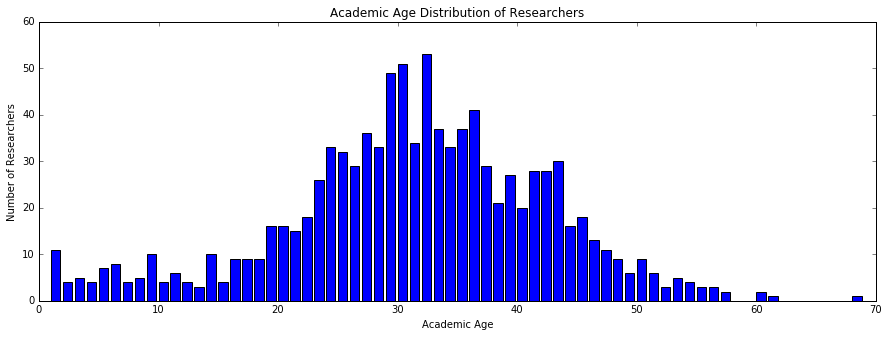

In [81]:
ranked_df = ranked_authors.head(1000).groupby('academic_age')['authors'].count().reset_index()

fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.bar(ranked_df['academic_age'], ranked_df['authors'])
plt.title('Academic Age Distribution of Researchers')
plt.xlabel('Academic Age')
plt.ylabel('Number of Researchers')

In [ ]:
# https://en.wikipedia.org/wiki/Azriel_Rosenfeld
# In honor of the memory of Rosenfeld, ICCV gives the biennial Azriel Rosenfeld Award to a living person in the recognition of an outstanding life-time contribution to the field of image understanding or computer vision.
# Rosenfeld was a leading researcher in the field of computer image analysis. Over a period of nearly 40 years he made many fundamental and pioneering contributions to nearly every area of that field. He wrote the first textbook in the field (1969); was founding editor of its first journal (1972); and was co-chairman of its first international conference (1987). He published over 30 books and over 600 book chapters and journal articles, and directed nearly 60 Ph.D. dissertations.

# Rosenfeld's research on digital image analysis (specifically on digital geometry and digital topology, and on the accurate measurement of statistical features of digital images) in the 1960s and 1970s formed the foundation for a generation of industrial vision inspection systems that have found widespread applications from the automotive to the electronics industry.

In [48]:
ranked_authors[ranked_authors['authors'] == 'Charles E. Leiserson']

,authors,academic_age,s-index
2902,Charles E. Leiserson,38,0.129354


In [49]:
ranked_authors['authors'].unique().shape

(1766547,)

In [12]:
ranked_authors[ranked_authors['authors'] == 'Richard M. Karp']

,index,authors,academic_age,total_score,max_year
91,1304778,Richard M. Karp,54,1.034748,2014


In [13]:
ranked_authors[ranked_authors['authors'] == 'Arie E. Kaufman']

,index,authors,academic_age,total_score,max_year
1930,130627,Arie E. Kaufman,42,0.170107,2017


In [14]:
ranked_authors[ranked_authors['authors'] == 'Michael Stonebraker']

,index,authors,academic_age,total_score,max_year
1,1064371,Michael Stonebraker,44,3.354656,2017


In [15]:
ranked_authors[ranked_authors['authors'] == 'Joseph S. B. Mitchell']

,index,authors,academic_age,total_score,max_year
1005,769177,Joseph S. B. Mitchell,34,0.262191,2017


In [16]:
ranked_authors[ranked_authors['authors'] == 'Steven Skiena']

,index,authors,academic_age,total_score,max_year
2487,1478444,Steven Skiena,29,0.143762,2017


In [17]:
ranked_authors[ranked_authors['authors'] == 'Scott Shenker']

,index,authors,academic_age,total_score,max_year
102,1391413,Scott Shenker,31,0.995337,2017


In [18]:
ranked_authors[ranked_authors['authors'] == 'Jon M. Kleinberg']

,index,authors,academic_age,total_score,max_year
446,753543,Jon M. Kleinberg,26,0.433735,2017


In [19]:
ranked_authors[ranked_authors['authors'] == 'Kenneth A. Ross']

,index,authors,academic_age,total_score,max_year
2479,841029,Kenneth A. Ross,30,0.143996,2017


In [20]:
ranked_authors[ranked_authors['authors'] == 'Anant Agarwal']

,index,authors,academic_age,total_score,max_year
195,86220,Anant Agarwal,33,0.689549,2014


In [21]:
ranked_authors[ranked_authors['authors'] == 'John L. Hennessy']

,index,authors,academic_age,total_score,max_year
29,747767,John L. Hennessy,37,1.671913,2016


In [22]:
ranked_authors[ranked_authors['authors'] == 'Jiawei Han']

,index,authors,academic_age,total_score,max_year
328,720105,Jiawei Han,32,0.516504,2017


In [23]:
ranked_authors[ranked_authors['authors'] == 'Herbert A. Simon']

,index,authors,academic_age,total_score,max_year
1230,579030,Herbert A. Simon,48,0.227589,2001


In [59]:
ranked_authors[ranked_authors['authors'] == 'Anil K. Jain']

,authors,academic_age,s-index
27,Anil K. Jain,44,1.712872


In [70]:
ranked_authors[ranked_authors['authors'] == 'Andrew Zisserman']

,authors,academic_age,s-index
5,Andrew Zisserman,32,2.947706


In [60]:
ranked_authors.shape

(1766547, 3)

In [24]:
ranked_authors.to_pickle('final_pickles/flattened_chunks/final_ranked_authors_v3.pickle')

In [50]:
h_index = {}

with open('validation/h_index_top100') as f:
        line = 1
        lines = f.readlines()
        author = None
        for l in lines:
                if line % 4 == 0 and author is None:
                        author = l.strip()
                if line % 8 == 0:
                        index = int(l.strip())
                        h_index[author] = index
                        author = None
                line += 1

sorted_index = sorted(h_index.items(), key=lambda x: x[1], reverse=True)
print(sorted_index)

[('Anil K. Jain', 179), ('Herbert Simon', 175), ('Jiawei Han', 162), ('Terrence Sejnowski', 151), ('David Haussler', 151), ('Takeo Kanade', 151), ('Philip S. Yu', 148), ('Michael I. Jordan', 148), ('Scott Shenker', 146), ('Andrew Zisserman', 144), ('Thomas S. Huang', 144), ('Guanrong Chen', 143), ('Sebastian Thrun', 141), ('Geoffrey Hinton', 140), ('Wil van der Aalst', 140), ('De Moor Bart', 134), ('TOMASO POGGIO', 134), ('hector garcia-molina', 133), ('Georgios B. Giannakis', 133), ('Daphne Koller', 130), ('Eric Horvitz', 129), ('Yoshua Bengio', 129), ('Alex Sandy Pentland', 129), ('Jack Dongarra', 127), ('Francisco Herrera', 127), ('Ian Foster', 127), ('HongJiang Zhang', 126), ('Deborah Estrin', 125), ('Bernhard Scholkopf', 124), ('Didier Dubois', 124), ('Luc Van Gool', 124), ('Stephen Grossberg', 124), ('Don Towsley', 124), ('HV Poor', 123), ('christos papadimitriou', 123), ('Christos Faloutsos', 122), ('Mark Horowitz', 122), ('Rajkumar Buyya', 120), ('David CULLER', 120), ('Henri P

In [51]:
df_X = pd.DataFrame(sorted_index)

In [53]:
df_X.head(10)

,0,1
0,Anil K. Jain,179
1,Herbert Simon,175
2,Jiawei Han,162
3,Terrence Sejnowski,151
4,David Haussler,151
5,Takeo Kanade,151
6,Philip S. Yu,148
7,Michael I. Jordan,148
8,Scott Shenker,146
9,Andrew Zisserman,144


In [58]:
r = []
for x in sorted_index:
    r.append(ranked_authors[ranked_authors['authors'] == x[0]])
r_df = pd.DataFrame(r)
r_df

,0
0,authors academic_age s-index 27 A...
1,"Empty DataFrame Columns: [authors, academic_ag..."
2,authors academic_age s-index 328 J...
3,"Empty DataFrame Columns: [authors, academic_ag..."
4,authors academic_age s-index 13 ...
5,authors academic_age s-index 2 Tak...
6,authors academic_age s-index 198 ...
7,authors academic_age s-index ...
8,authors academic_age s-index 102...
9,authors academic_age s-index 5 ...


In [72]:
df_Y = pd.read_csv('validation/rank_h_index.csv')

In [73]:
df_Y

,Name of Researcher,h-index,h-index rank,s-index rank,s-index
0,Anil K. Jain,179,0,27,1.712872
1,Herbert Simon,175,1,1230,0.227589
2,Jiawei Han,162,2,328,0.516504
3,Terrence Sejnowski,151,3,256,0.595427
4,David Haussler,151,4,13,2.265852
5,Takeo Kanade,151,5,2,3.073051
6,Philip S. Yu,148,6,198,0.680757
7,Michael I. Jordan,148,7,56,1.284312
8,Scott Shenker,146,8,102,0.995337
9,Andrew Zisserman,144,9,5,2.947706
